# Wine Database Analysis

## Table of Contents
- [Introduction](#intro)
- [Part I - Data Cleaning](#clean)
- [Part II - Answering Questions](#answer)
- [Part III - Conclusions](#conc)


<a id='intro'></a>
## Introduction

The dataset is available at the UCL website: https://archive.ics.uci.edu/ml/datasets/wine
The csv file is about wine data, contains various aspects of red and white wine with ratings.
For this project, I will be cleaning the data, finding out solutions for my questions:

1 Is a certain type of wine (red or white) associated with higher quality?\
2 What level of acidity (pH value) receives the highest average rating?\
3 Do wines with higher alcoholic content receive better ratings?\
4 Do sweeter wines receive better ratings?


<a id='clean'></a>
## Part I - Data Cleaning

In [1]:
#import data, separate data by semicolon ;
import pandas as pd
import numpy as np
import statsmodels.api as sm;
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()


red_df=pd.read_csv('winequality-red.csv',sep = ';')
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
white_df=pd.read_csv('winequality-white.csv',sep = ';')
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#adding color column 1
import numpy as np
red_color=np.repeat('red',red_df.shape[0])
white_color=np.repeat('white',white_df.shape[0])

In [4]:
#adding color column 2
red_df['color']=red_color
white_df['color']=white_color

In [5]:
#save as new file
red_df.to_csv ('winequality-red_edited.csv',index=False)
white_df.to_csv ('winequality-white_edited.csv',index=False)

In [6]:
#combine two files
wine_df=red_df.append(white_df)
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
#save as new file
wine_df.to_csv('winequality_edited.csv',index=False)

<a id='answer'></a>
## Part Ⅱ - Answering Questions

### 1 Is a certain type of wine (red or white) associated with higher quality?

In [8]:
wine_df.groupby(['color']).quality.mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [9]:
wine_df.query('color == "white"').quality.mean() - wine_df.query('color == "red"').quality.mean()

0.2418868366841158

### White wines have slightly higher rating

### Visualization

In [11]:
color_means = wine_df.groupby('color').quality.mean()

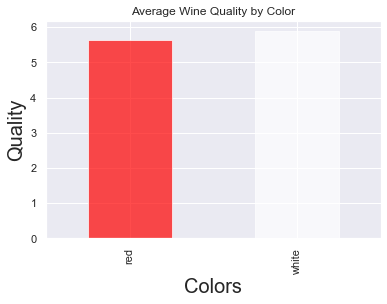

In [12]:
color_means.plot(kind = 'bar' , color = ['red' , 'white'] , alpha = .7 , title = 'Average Wine Quality by Color');

plt.xlabel('Colors' , fontsize = 20);
plt.ylabel('Quality' , fontsize = 20);

### Visualization 2: Plotting propotions of each wine

In [54]:
#Get counts for each rating and color
color_counts = wine_df.groupby(['color' , 'quality']).pH.count()

In [55]:
#Get total counts for each types of wine
color_totals = wine_df.groupby('color').pH.count()

In [56]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']

In [57]:
# make sure red wine and white wine have same amount of quality data
red_proportions['9'] = 0

In [58]:
# White samples
white_proportions = color_counts['white'] / color_totals['white']

In [19]:
# x locations forthe group
ind = np.arange(len(red_proportions)) 
width = 0.35      

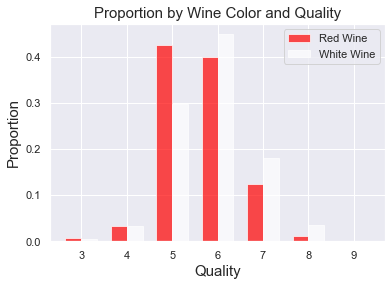

In [33]:
# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='red', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='white', alpha=.7, label='White Wine')


# title and labels
plt.ylabel('Proportion' , fontsize = 15)
plt.xlabel('Quality' , fontsize = 15)
plt.title('Proportion by Wine Color and Quality' , fontsize = 15)
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

#### Although there are more white wines if the wine quality is 6 or higher, red wines have more medium quality(5 or less) wines.

### 2 What level of acidity (pH value) receives the highest average rating?

In [34]:
wine_df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [35]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.72,3.11,3.21,3.32,4.01]

In [36]:
# Labels for the four acidity level groups
bin_names = ['high', 'mod_high', 'medium', 'low'] 

In [37]:
# Creates acidity_levels column
wine_df['acidity levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,mod_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,mod_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,low
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,medium
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,low
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,low
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,low


In [60]:
# Find the mean quality of each acidity level with groupby
acidity_levels = wine_df.groupby('acidity_levels').quality.mean()
acidity_levels

acidity_levels
high        5.783343
mod_high    5.784540
medium      5.850832
low         5.859593
Name: quality, dtype: float64

### Low acidity wines have higher ratings

### Visualization

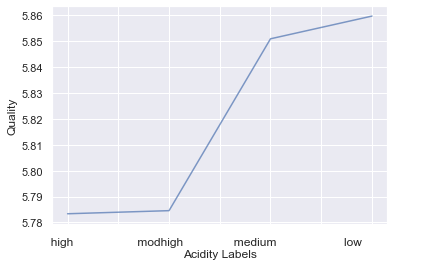

In [40]:
wine_df=wine_df.rename(columns={'acidity levels':'acidity_levels'})
wine_df.groupby('acidity_levels').quality.mean().plot(kind='line',alpha=.7);
plt.ylabel('Quality') 
plt.xlabel('          high                   modhigh               medium                    low                  \nAcidity Labels')
labels=['low','medium','mod_high','low']

### 3 Do wines with higher alcoholic content receive better ratings?

In [41]:
wine_df['alcohol'].median()

10.3

In [42]:
# select samples with alcohol content less than the median
low_alcohol = wine_df.query('alcohol < 10.3')
# select samples with alcohol content greater than or equal to the median
high_alcohol = wine_df.query('alcohol >= 10.3')

# ensure these queries included each sample exactly once
num_samples = wine_df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() 

True

In [43]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol.quality.mean() , high_alcohol.quality.mean()

(5.475920679886686, 6.146084337349397)

### Higher alcohol wines have higher ratings

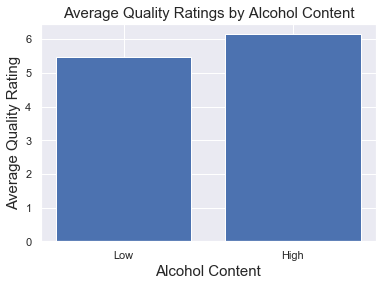

In [53]:
#Visualization
low_mean_quality = low_alcohol.quality.mean()
high_mean_quality = high_alcohol.quality.mean()

locations = [1 , 2]
heights = [low_mean_quality , high_mean_quality]
labels = ['Low' , 'High']
plt.bar(locations , heights , tick_label = labels)
plt.title('Average Quality Ratings by Alcohol Content' , fontsize = 15)
plt.xlabel('Alcohol Content' , fontsize = 15)
plt.ylabel('Average Quality Rating' , fontsize = 15);

### 4 Do sweeter wines receive better ratings?

In [46]:
wine_df=wine_df.rename(columns={'residual sugar':'residual_sugar'})

In [47]:
wine_df['residual_sugar'].median() 

3.0

In [48]:
# Define low sugar and high sugar wines, 
# Make sure catching all wine data
low_sugar = wine_df.query('residual_sugar < 3.0')  
high_sugar = wine_df.query('residual_sugar >= 3.0')
num_samples = wine_df.shape[0]
num_samples == low_sugar['residual_sugar'].count() + high_sugar['residual_sugar'].count() 

True

In [49]:
low_sugar.quality.mean() , high_sugar.quality.mean()

(5.808800743724822, 5.82782874617737)

### High residual sugar wine have slightly higher ratings

### Visualization

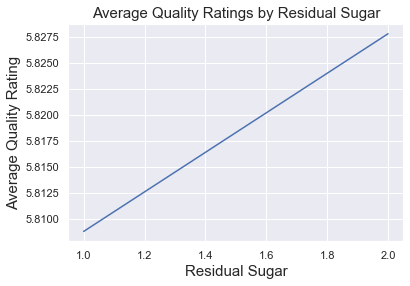

In [51]:
locations = np.array([1, 2])
height = np.array([5.808800743724822, 5.82782874617737])
plt.plot(locations, height)


plt.title('Average Quality Ratings by Residual Sugar' , fontsize = 15)
plt.xlabel('Residual Sugar' , fontsize = 15)
plt.ylabel('Average Quality Rating' , fontsize = 15);

<a id='conc'></a>
## Part Ⅲ - Conclusions

1: After cleaning the data, I computed the mean value of wine quality to figure out there is certain type of wine (red or white) associated with higher quality or not.The result was: red wines **5.636023** and white wines **5.877909**. White wine has slightly higher rating than red wine overall, then I did a further analysis to figure out mean values of each quality rates. After second analysis, I found on higher rating(6 or higher), there are more white wines than red wines and on lower rating(5 or smaller), there are more red wines than white wines.

2: I analyzed about what level of acidity (pH value) receives the highest average rating. Low pH value means the wine has higher acidity.I devided pH value data into 4 levels of acidity(high, moderate high, medium, low), and the value was: high **5.783343** mod_high **5.784540** medium **5.850832** low **5.859593**. Medium and low acidity wines have higher ratings.

3; I figured out whether wines with higher alcoholic content receive better ratings or not. I computed median value of wines(10.3) and devided dataset into half(high alcohol and low alcohol). Then I figured out that higher alcohol wine have average rating of **6.146084337349397** and lower alcohol wines have average ratings of **5.475920679886686**. 

4: Similar to 3, I figured out sweeter wines receive better ratings or not.By computing the median value of residual sugar content of wines(3.0), I was able to find avarage quality of low sugar wines. The values are: **5.808800743724822** for low sugar wines, **5.82782874617737** for high sugar wines. Therefore, high residual sugar wine have slightly higher ratings.